In [2]:
import pandas as pd 

suicide = pd.read_csv('suicide.csv')

suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212160 entries, 0 to 212159
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   measure   212160 non-null  object 
 1   location  212160 non-null  object 
 2   sex       212160 non-null  object 
 3   age       212160 non-null  object 
 4   cause     212160 non-null  object 
 5   metric    212160 non-null  object 
 6   year      212160 non-null  int64  
 7   val       212160 non-null  float64
 8   upper     212160 non-null  float64
 9   lower     212160 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 16.2+ MB


In [3]:
import pandas as pd
import pycountry

# load
suicide = pd.read_csv('suicide.csv')

# keep only the five columns you need and rename them
suicide = (suicide
    .loc[:, ['location', 'sex', 'age', 'year', 'val']]
    .rename(columns={
        'location': 'country_name',
        'sex':      'gender',
        'age':      'age_group',
        'val':      'suicide_rate/100k'
    })
)

# helper function to get ISO alpha-3 country code
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

# map country names to codes
suicide['country_code'] = suicide['country_name'].apply(get_country_code)

# check which couldn't be mapped
unmapped = suicide.loc[suicide['country_code'].isna(), 'country_name'].unique()
print("Need to fix these by hand:", unmapped)


Need to fix these by hand: ['Palestine' 'Micronesia (Federated States of)'
 'Democratic Republic of the Congo' 'Republic of Korea'
 'Venezuela (Bolivarian Republic of)' 'Iran (Islamic Republic of)'
 'Bolivia (Plurinational State of)' 'United States Virgin Islands']


In [4]:
# manual fixes for country name mismatches
manual_fixes = {
    'Palestine': 'PSE',
    'Micronesia (Federated States of)': 'FSM',
    'Democratic Republic of the Congo': 'COD',
    'Republic of Korea': 'KOR',
    'Venezuela (Bolivarian Republic of)': 'VEN',
    'Iran (Islamic Republic of)': 'IRN',
    'Bolivia (Plurinational State of)': 'BOL',
    'United States Virgin Islands': 'VIR'
}

# apply manual fixes
suicide['country_code'] = suicide.apply(
    lambda row: manual_fixes.get(row['country_name'], row['country_code']),
    axis=1
)

# confirm no missing codes
still_unmapped = suicide.loc[suicide['country_code'].isna(), 'country_name'].unique()
print("✅ All country codes added!" if len(still_unmapped) == 0 else "❌ Still need to fix:", still_unmapped)

# check
print(suicide.info())


✅ All country codes added! []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212160 entries, 0 to 212159
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   country_name       212160 non-null  object 
 1   gender             212160 non-null  object 
 2   age_group          212160 non-null  object 
 3   year               212160 non-null  int64  
 4   suicide_rate/100k  212160 non-null  float64
 5   country_code       212160 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.7+ MB
None


In [5]:
suicide.head()

,country_name,gender,age_group,year,suicide_rate/100k,country_code
0,Ukraine,Male,10-14 years,2000,4.299559,UKR
1,Ukraine,Female,10-14 years,2000,1.195484,UKR
2,Ukraine,Male,15-19 years,2000,20.880703,UKR
3,Ukraine,Female,15-19 years,2000,5.354390,UKR
4,Ukraine,Male,20-24 years,2000,47.402525,UKR


In [6]:
# Save the cleaned data to a new CSV file
suicide.to_csv('suicide_cleaned.csv', index=False)

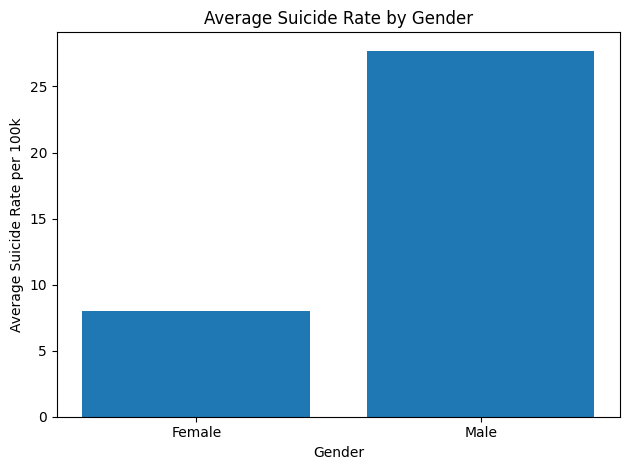

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# aggregate by gender
grouped = suicide.groupby('gender')['suicide_rate/100k'].mean().reset_index()

# plot
plt.figure()
plt.bar(grouped['gender'], grouped['suicide_rate/100k'])
plt.xlabel('Gender')
plt.ylabel('Average Suicide Rate per 100k')
plt.title('Average Suicide Rate by Gender')
plt.tight_layout()
plt.show()


Top 10 countries by avg rate (2000–2019):
 country_name
Greenland                   79.870962
Guyana                      47.252757
Lithuania                   47.207435
Russian Federation          44.848662
Central African Republic    43.065473
Republic of Korea           41.601086
Mozambique                  41.165872
Kazakhstan                  41.019791
Eswatini                    40.915217
Belarus                     40.431739
Name: suicide_rate/100k, dtype: float64


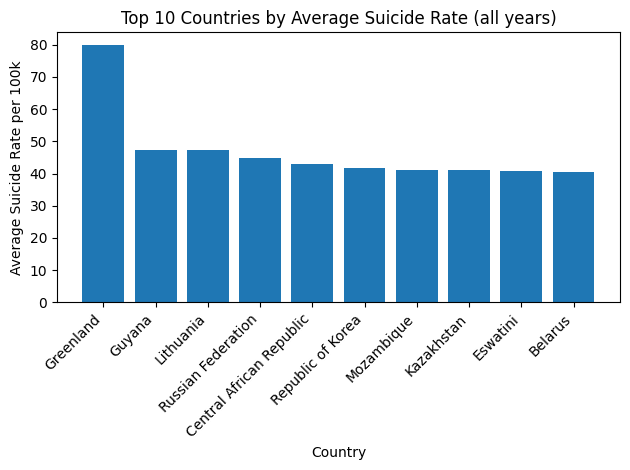

In [6]:
import matplotlib.pyplot as plt

# compute each country’s average suicide rate across all years
top10 = (
    suicide
    .groupby('country_name')['suicide_rate/100k']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print("Top 10 countries by avg rate (2000–2019):\n", top10)

# plot
plt.figure()
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Average Suicide Rate per 100k')
plt.title('Top 10 Countries by Average Suicide Rate (all years)')
plt.tight_layout()
plt.show()



In [8]:
# read csv 
depression = pd.read_csv('depression_cleaned.csv')
depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     4080 non-null   object 
 1   country_code     4080 non-null   object 
 2   year             4080 non-null   int64  
 3   depression_rate  4080 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 127.6+ KB


Top 10 countries by avg depression rate (all years):
 country_name
Greenland                   5652.513602
Greece                      5467.987080
Palestine                   4797.470953
Portugal                    4685.539401
Tunisia                     4313.280921
Ukraine                     4113.487059
Bahrain                     4112.514055
Lithuania                   4062.693099
Australia                   4046.256600
Islamic Republic of Iran    4018.668957
Name: depression_rate, dtype: float64


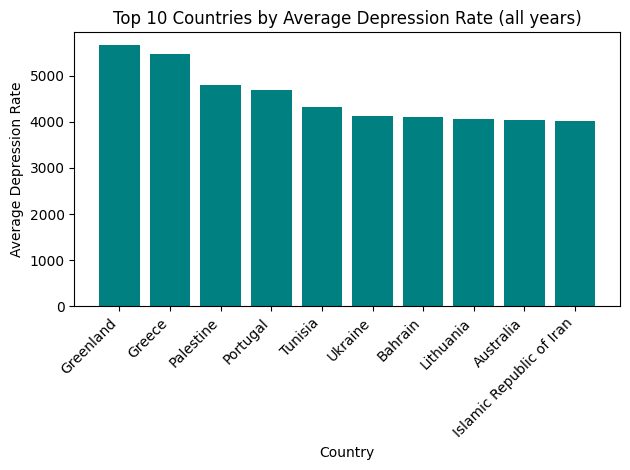

In [10]:
import matplotlib.pyplot as plt

# compute average depression rate per country across all years
top10_dep = (
    depression
    .groupby('country_name')['depression_rate']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 countries by avg depression rate (all years):\n", top10_dep)

# plot
plt.figure()
plt.bar(top10_dep.index, top10_dep.values, color='teal')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Average Depression Rate')
plt.title('Top 10 Countries by Average Depression Rate (all years)')
plt.tight_layout()
plt.show()


In [6]:
num_countries = suicide['country_name'].nunique()
print("Number of unique countries in the suicide dataset:", num_countries)

Number of unique countries in the suicide dataset: 204
